![alt text](https://drive.google.com/uc?export=view&id=1DXUVHxd4t15mfuqMgMCLnsP4jWVI5EWz)




---



<br>
© 2024 Copyright The University of New South Wales - CRICOS 00098G

**Author**: Oscar Perez-Concha: o.perezconcha@unsw.edu.au

**Contributors/Co-authors**: Marta Fredes-Torres, Zhisheng (Sandy) Sa and Matthew Sainsbury-Dale.



---



# Laboratory 5: Gradient Boosted Trees



---



# 1. Introduction

In this exercise, we will introduce gradient boosted trees. The notebooks will gradually become less guided from now on to allow you to create your own solutions.


## 1.1. Aims of the Exercise:
 1. To introduce gradient boosted trees.
 2. To explore hyperparameters and determine appropriate choices.


This exercise aligns with all of the learning outcomes of our course:

1.	Distinguish a range of task specific machine learning techniques appropriate for Health Data Science.
2.	Design machine learning tasks for Health Data Science scenarios.


## 1.2. Jupyter Notebook Intructions
1. Read the content of each cell.
2. Where necessary, follow the instructions that are written in each cell.
3. Run/Execute all the cells that contain Python code sequentially (one at a time), using the "Run" button.
4. For those cells in which you are asked to write some code, please write the Python code first and then execute/run the cell.

## 1.3. Tips
1. Run all the cells in sequence (one at a time), using the "Run" button.
2. To edit this notebook, just double-click in each cell. Choose between "Code" cell or text "Markdown" cell in the combo-box above.
3. If you want to save your notebook, please go File->Save a copy on Drive/GitHub.
4. To clean the content of all cells and re-start Notebook, please go to Edit->Clear all outputs then Runtime->Restart untime

Follow the instructions given and if you have any questions, please use the **Comments section** in **Open Learning**.



---





---



# 2. Initial Docstring:


All programs should have an initial docstring comment. It must include at least the following elements:

* Purpose: what is the aim of your code?
* Date created
* Author
* Date modified
* Author of the modification
* Method: how did you go about solving the problem?
* Data dictionary: The data dictionary should contain all the important variables and constants defined, their datatype (float, string, int) and a short description of what they are.
* List and defintions of functions: similar to the data dictionary, but with functions.
* List of libraries: libraries used in the program and their functionality.

Is there anything else you think we should include in the docstring? Please comment in the comments section of this week's laboratory.

Please read these two documents:
1. pandas docstring guide: https://pandas.pydata.org/pandas-docs/version/0.23/contributing_docstring.html
2. Style guide: https://www.cse.unsw.edu.au/~en1811/resources/style.html


<b> Docstring:</b>
#####################################################################################################################



#####################################################################################################################



---





---



# 3. Exploration of the Wisconsin Cancer Data Set

Read the data dictionary and more information [here](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)).

Some images are shown below.

![alt text](https://drive.google.com/uc?export=view&id=1gEuEsg6xZIAErGNiEj2QctybNiXKl3a9)
![alt text](https://drive.google.com/uc?export=view&id=1tIfc3IIwDjboD3YpbmhXRbgOBxSv3M3A)
![alt text](https://drive.google.com/uc?export=view&id=1bgQF4oo6BlIe21jIUGWbhEkhzpNbhbqn)
![alt text](https://drive.google.com/uc?export=view&id=18jDQmeiDk_z06et2HIgCs9Owwddt_oCh)

In [ ]:
# Insert your comments and explanations

# Add your code or enhance the existing one

# This means that every part of the program must be commented on,
# and the rationale behind your code must be explained.
# Please remember to comment your code thoroughly, though I won't repeat the last two lines.
# That is, I provided some code, but not all the comments.
# If you need help with the comments, please let me know.

import sys
import numpy as np
import pandas as pd

In [ ]:
# Insert your comments and explanations

# Add your code or enhance the existing one



# Mount Google Drive
# We do not need to run this cell if you are not running this notebook in Google Colab

if 'google.colab' in str(get_ipython()):
    from google.colab import drive # import drive from Gogle colab
    root = '/content/drive'     # default location for the drive
    # print(root)                 # print content of ROOT (Optional)
    drive.mount(root)
else:
    print('Not running on CoLab')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Mount Google Drive
# We do not need to run this cell if you are not running this notebook in Google Colab

if 'google.colab' in str(get_ipython()):
    from google.colab import drive # import drive from Gogle colab
    root = '/content/drive'     # default location for the drive
    # print(root)                 # print content of ROOT (Optional)
    drive.mount(root)
else:
    print('Not running on CoLab')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Insert your comments and explanations

# Add your code or enhance the existing one


from pathlib import Path

if 'google.colab' in str(get_ipython()):
    # EDIT THE PROJECT PATH IF DIFFERENT WITH YOUR ONE
    # You may need to change 'MyDrive' to 'My Drive'.
    project_path = Path(root) / 'MyDrive' / 'Colab Notebooks'

    # OPTIONAL - set working directory according to your google drive project path
    # import os
    # Change directory to the location defined in project_path
    # os.chdir(project_path)
else:
    project_path = Path()



---





---



# 4. Data Preparation

### <font color='blue'>  4.1. Load the dataset. </font>

In [ ]:
# Insert your comments and explanations

# Add your code


data_path = Path(project_path) / 'Breast-Cancer-Wisconsin.csv'
cancer = pd.read_csv(data_path, sep=',')

In [ ]:
# Insert your comments and explanations

# Add your code or enhance the existing one

# Dimensions of my dataset
cancer.shape

(569, 32)

In [ ]:
# Insert your comments and explanations

# Add your code or enhance the existing one

cancer.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [ ]:
# Insert your comments and explanations

# Add your code or enhance the existing one


# Drop 'id' variables
cancer = cancer.drop(['id'],axis=1)
display(cancer[:][:5])

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Insert your comments and explanations

# Add your code or enhance the existing one

cancer.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


### <font color='blue'> 4.2. Split the data into training and test sets </font>


Now let's split the data into a training and test set. We will include the optional argument 'stratify = y' to preserve the ratio between diagnosis = B to diagnosis = M.

In [ ]:
# Insert your comments and explanations

# Add your code or enhance the existing one


X = cancer.drop(axis=1, columns=['diagnosis'])
y = cancer[['diagnosis']].values

In [ ]:
# Insert your comments and explanations

# Add your code or enhance the existing one


# Sanity check
X.head(5)
#display(X[:][:5])
#display(y[:][:5])

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Insert your comments and explanations

# Add your code or enhance the existing one

# 80% Training, 20% Test


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0, test_size = 0.20)



---





---



# 5. Gradient Boosted Decision Trees (no hyperparameter tuning)



### <font color='blue'> Train and evaluate the model. </font>

Gradient boosted trees are an *ensemble* of decision trees. *Ensemble* is a general term referring to methods that combine multiple machine learning models to create a more powerful model. There are two widely used ensembles based on decision trees: *Gradient boosted trees*, and *Random forests*. Here, we will introduce Gradient Boosted Trees.<p>

Gradient boosted trees work by building a large number of trees where each tree tries to correct the mistakes of the previous one. The way this is achieved is by fitting each subsequent tree on a modified version of the original dataset, depending on how the previous trees performed. Given the current model, we fit a decision tree with the residuals (the unexplained variation) from the model. That is, we fit a new tree using the current residuals, rather than the whole outcome Y, as the outcome. We then add this new decision tree into the fitted function in order to update the residuals.<p>

Reading material and videos:
1. [Scikit-learn API](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)
2. [Video 1: Regression](https://www.youtube.com/watch?v=3CC4N4z3GJc)
3. [Video 2: Classification](https://www.youtube.com/watch?v=jxuNLH5dXCs)


We are going to create the `gbt` object *that encapsulates the algorithm that will be used to build the model from
the training data, as well the algorithm to make predictions on new data points. It will
also hold the information that the algorithm has extracted from the training data* (source: Géron, Aurélien. Hands-On Machine Learning with Scikit-Learn and TensorFlow. Chapter 1).

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbt = GradientBoostingClassifier(random_state=0)

In [ ]:
# Chech the shape of y_train
# Per the API, method .fit()
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
# y has to be an array-like of shape (n_samples,)
y_train.shape

(455, 1)

My array is (455,1), so in order to have (455,) as the specifications asked, I have to "flat" my array with "ravel()".

In [ ]:
y_train.ravel().shape

(455,)

In [ ]:
gbt.fit(X_train, y_train.ravel())

GradientBoostingClassifier(random_state=0)

*The fit method returns the object itself (and modifies it in place), so we get a string representation of our classifier. The representation shows us which parameters were used in creating the model. Nearly all of them are the default values, but you can also find `random_state=0`, which is a hyper-parameter that we passed. Most models in scikit-learn have several hyper-parameters, but many of them are either speed optimisations or for very special use cases*. (source: Géron, Aurélien. Hands-On Machine Learning with Scikit-Learn and TensorFlow. Chapter 1).

Let's calculate accuracy for the training and test set:

In [ ]:
print("***********************************************************:")
print("Step 1: No hyperparameter tuning:")
print("Accuracy")
print("***********************************************************:")
print("Accuracy of the GBT on training set: {:.3f}".format(gbt.score(X_train, y_train)))
print("Accuracy of the GBT on test set: {:.3f}".format(gbt.score(X_test, y_test)))
print("***********************************************************:")

***********************************************************:
Step 1: No hyperparameter tuning:
Accuracy
***********************************************************:
Accuracy of the GBT on training set: 1.000
Accuracy of the GBT on test set: 0.965
***********************************************************:


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(confusion_matrix, data_set_name, model_name, set):
    """
    Visualize the confusion matrix with custom labels.

    Args:
    confusion_matrix (array-like): Confusion matrix to be visualized.
    data_set_name (str): Name of the data set. For example, "Training set"
    model_name (str): Name of the model. For example, "Benchmark Logistic Regression"
    """
    # Visualize the confusion matrix
    labels = ['B', 'M']
    ax = plt.subplot()
    sns.heatmap(confusion_matrix, annot=True, fmt='.0f', ax=ax, cmap='viridis')

    # Labels, titles, and ticks
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(f'Confusion Matrix of the {data_set_name} set for the {model_name} model on the {set} set.')
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)

    plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

# Predictions using our model
y_pred_gbt_train = gbt.predict(X_train)
y_pred_gbt_test = gbt.predict(X_test)

# Confusion Matrix
confusion_matrix_gbt_train = confusion_matrix(y_true = y_pred_gbt_train, y_pred = y_train)
confusion_matrix_gbt_test = confusion_matrix(y_true = y_pred_gbt_test, y_pred = y_test)

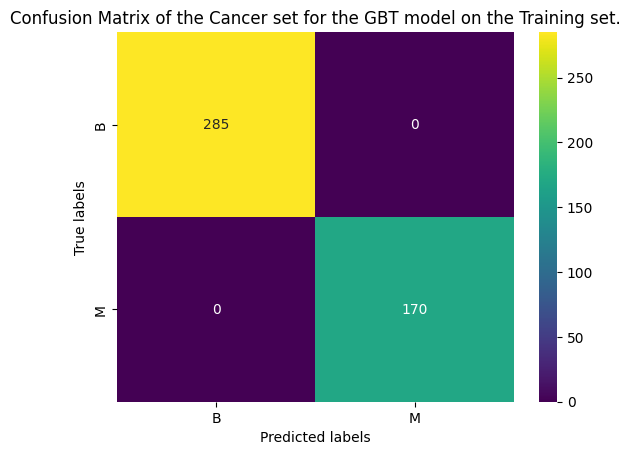

In [ ]:
plot_confusion_matrix(confusion_matrix_gbt_train, 'Cancer', 'GBT', 'Training')

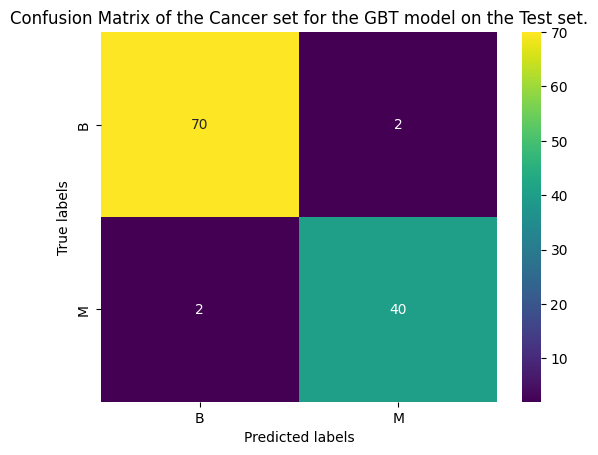

In [ ]:
plot_confusion_matrix(confusion_matrix_gbt_test, 'Cancer', 'GBT', 'Test')

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print("***********************************************************:")
print("Step 1: No hyperparameter tuning:")
print("Classification report")
print("***********************************************************:")
print("Training set:")
print(classification_report(y_train, y_pred_gbt_train))
print("***********************************************************:")
print("Test set:")
print(classification_report(y_test, y_pred_gbt_test))
print("***********************************************************:")

***********************************************************:
Step 1: No hyperparameter tuning:
Classification report
***********************************************************:
Training set:
              precision    recall  f1-score   support

           B       1.00      1.00      1.00       285
           M       1.00      1.00      1.00       170

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455

***********************************************************:
Test set:
              precision    recall  f1-score   support

           B       0.97      0.97      0.97        72
           M       0.95      0.95      0.95        42

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

***********************************************************:




---





---



# 6. Gradient Boosted Decision Trees - hyperparameter tuning.



---



### <font color='blue'> Train and evaluate the model. Fine-tune the model using `GridSearchCV()`. </font>


In terms of hyperparameters, we have the previous ones such as **depth of the tree**, **maximum number of leaves**, and **minimum splitting size**. However,  there is **no hyperparameter for 'class_weight'** in gradient boosting trees for sklearn.  <p>
    We also have two new hyperparameters:
* `n_estimators`, the number of trees in the ensemble. Increasing n_estimators in gradient boosting leads to a more complex model, which may lead to over-fitting
* `learning_rate`. The learning rate controls how strongly each tree tries to correct the mistakes of the previous trees. Learning_rate is a decimal number between 0 and 1, with low values indicating slow learning and higher values indicating fast learning.

Ideally, we would like to tune all the hyperparameters. However, as we are restrained by both time and computational power, we will restrict ourselves to tuning only the `n_estimator`, `max_leaf_nodes` and `learning_rate`. The hyperparameters `n_estimator` and `learning_rate` are highly interconnected, as a lower `learning_rate` means that more trees are needed to build a model of similar complexity. Using this knowledge, we will choose a value of `n_estimators` that is feasible given our time and computational power constraints, and then find the best `learning_rate` given this value of `n_estimators`.



---



Here, we will attempt to find the hyperparameters that maximise the f1 score.

In [ ]:
gbt_gridsearch = GradientBoostingClassifier(random_state=0)

In [ ]:
# We need to redefine pos_label so we can use f1 score
from sklearn.metrics import make_scorer, f1_score
f1_scorer = make_scorer(f1_score, pos_label='M')
# Hence, M will be the class "yes", the patient has cancer.

# Alternatively, we can convert our labels to binary
# (y_train and y_test binary)
# If you do that, you will need to use these arrays.
# y_train_binary = [1 if x =='M' else 0 for x in y_train]
# y_test_binary = [1 if x =='M' else 0 for x in y_test]

In [ ]:
# Why these values?
# This is the second round for my GridSearchCV. I didn't show here the first round, but it gave me an idea of where to look for the second round
# We had this discussion in class, but happy to have a chat next time we see each other

param_grid = {'n_estimators': [90, 100, 110],
              'learning_rate': [0,38, 0.4, 0.42, 0.45],
              'max_leaf_nodes': [2,3]}

In [ ]:
from sklearn.model_selection import GridSearchCV
gbt_grid_search = GridSearchCV(gbt_gridsearch, param_grid=param_grid, cv=3, scoring = f1_scorer)

In [ ]:
gbt_grid_search.fit(X_train, y_train.ravel())

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0, 38, 0.4, 0.42, 0.45],
                         'max_leaf_nodes': [2, 3],
                         'n_estimators': [90, 100, 110]},
             scoring=make_scorer(f1_score, pos_label=M))

In [ ]:
# Print the best parameters
print("Best parameters found: ", gbt_grid_search.best_params_)

Best parameters found:  {'learning_rate': 0.42, 'max_leaf_nodes': 2, 'n_estimators': 100}


In [ ]:
# Predictions using our model (where gs stands for grid search)
y_pred_gbt_gs_train = gbt_grid_search.predict(X_train)
y_pred_gbt_gs_test = gbt_grid_search.predict(X_test)

# Confusion Matrix (where gs stands for grid search)
confusion_matrix_gbt_gs_train = confusion_matrix(y_true = y_pred_gbt_gs_train, y_pred = y_train)
confusion_matrix_gbt_gs_test = confusion_matrix(y_true = y_pred_gbt_gs_test, y_pred = y_test)

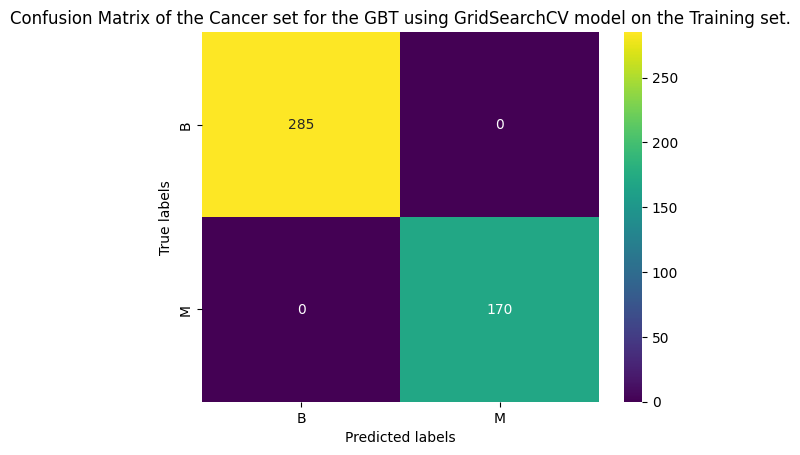

In [ ]:
plot_confusion_matrix(confusion_matrix_gbt_gs_train, 'Cancer', 'GBT using GridSearchCV', 'Training')

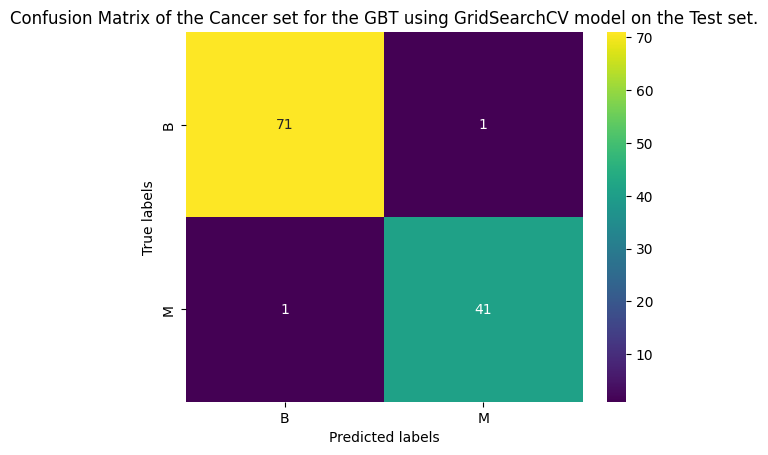

In [ ]:
plot_confusion_matrix(confusion_matrix_gbt_gs_test, 'Cancer', 'GBT using GridSearchCV', 'Test')

In [ ]:
print("***********************************************************:")
print("Step 1: With hyperparameter tuning:")
print("Classification report")
print("***********************************************************:")
print("Training set:")
print(classification_report(y_train, y_pred_gbt_gs_train))
print("***********************************************************:")
print("Test set:")
print(classification_report(y_test, y_pred_gbt_gs_test))
print("***********************************************************:")

***********************************************************:
Step 1: With hyperparameter tuning:
Classification report
***********************************************************:
Training set:
              precision    recall  f1-score   support

           B       1.00      1.00      1.00       285
           M       1.00      1.00      1.00       170

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455

***********************************************************:
Test set:
              precision    recall  f1-score   support

           B       0.99      0.99      0.99        72
           M       0.98      0.98      0.98        42

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

***********************************************************:




---





---

